Description: This programm uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf
yf.pdr_override()
import datetime as dt

In [3]:
start=2012-1-1
end=2019-12-17
data_source='google'

In [4]:
df = yf.download('AAPL', start='2001-1-1' , end='2022-12-17')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,0.225462,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,0.248198,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,0.258618,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,0.248198,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,0.251039,373699200
...,...,...,...,...,...,...
2022-12-12,142.699997,144.500000,141.059998,144.490005,143.876160,70462700
2022-12-13,149.500000,149.970001,144.240005,145.470001,144.852005,93886200
2022-12-14,145.350006,146.660004,141.160004,143.210007,142.601608,82291200


In [5]:
df.shape

(5526, 6)

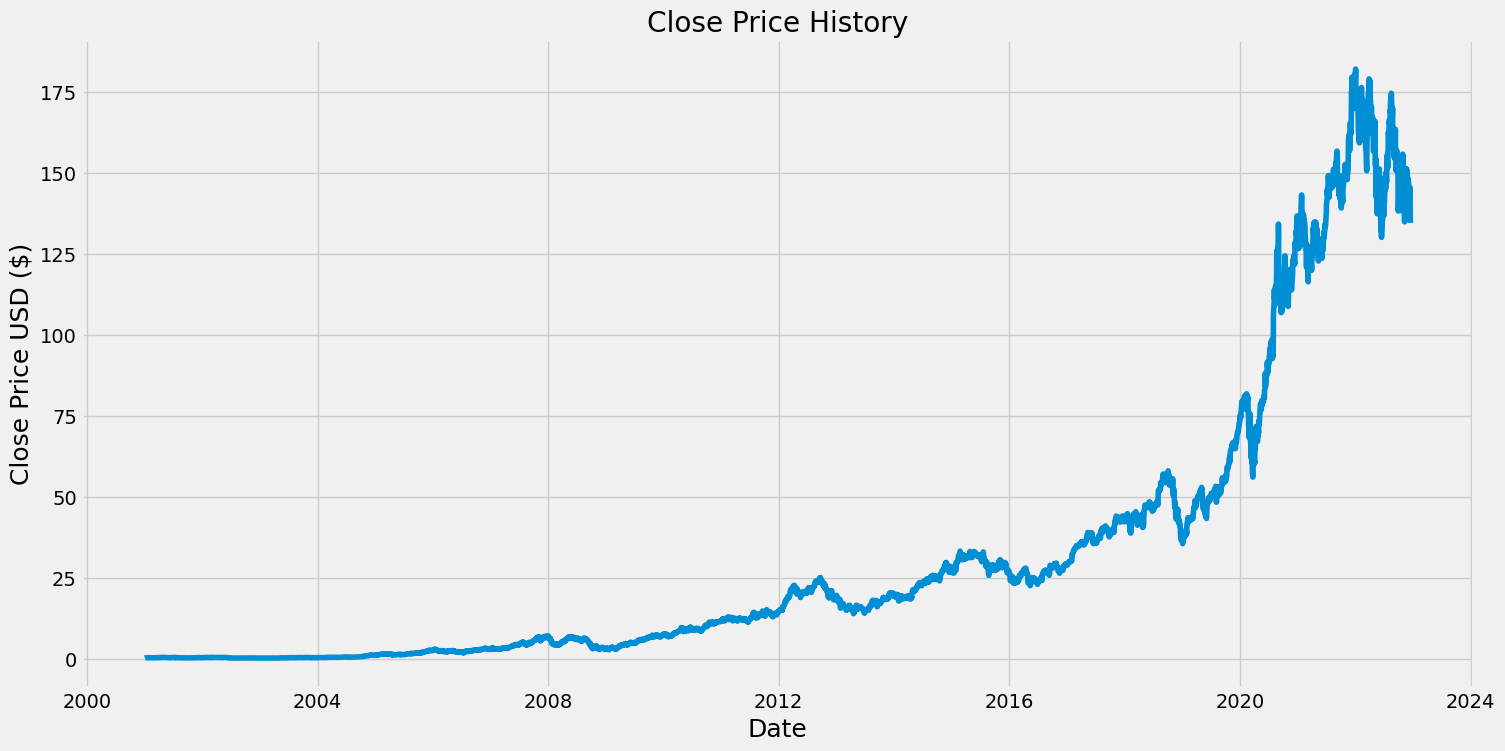

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [7]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

4421

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[1.72404800e-04],
       [3.19762220e-04],
       [3.87301537e-04],
       ...,
       [7.86550205e-01],
       [7.49636545e-01],
       [7.38688957e-01]])

In [9]:
train_data=scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.0001724 , 0.00031976, 0.0003873 , 0.00031976, 0.00033818,
       0.00039958, 0.00033818, 0.0004794 , 0.00039958, 0.00039344,
       0.00036274, 0.00054693, 0.00062675, 0.00060219, 0.00072499,
       0.00072499, 0.00066973, 0.00063289, 0.00084165, 0.00084779,
       0.00083551, 0.00078639, 0.00073727, 0.00069429, 0.00078639,
       0.00074955, 0.00074955, 0.00058991, 0.00064517, 0.00058991,
       0.00062675, 0.00068201, 0.00057763, 0.0005101 , 0.00056536,
       0.00055922, 0.00055922, 0.00062675, 0.00061447, 0.00050396,
       0.00055307, 0.00060219, 0.00071271, 0.00082323, 0.00079867,
       0.00075569, 0.00070043, 0.00054079, 0.00063289, 0.00071885,
       0.00064517, 0.00063903, 0.00073113, 0.00064517, 0.00068815,
       0.00083551, 0.00097058, 0.00085074, 0.00095781, 0.00088905])]
[0.0009244085298296303]

[array([0.0001724 , 0.00031976, 0.0003873 , 0.00031976, 0.00033818,
       0.00039958, 0.00033818, 0.0004794 , 0.00039958, 0.00039344,
       0.00036274, 0.00054693, 0.

In [10]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4361, 60, 1)

In [12]:
#BUILD THE LSTM MODEL
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [13]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

4361/4361 [==============================] - 59s 13ms/step - loss: 7.3028e-05


In [15]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
x_test=np.array(x_test)

In [17]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

35/35 [==============================] - 1s 9ms/step


In [19]:
rmse=np.sqrt(np.mean(predictions -y_test)**2)
rmse

6.4668324086461135

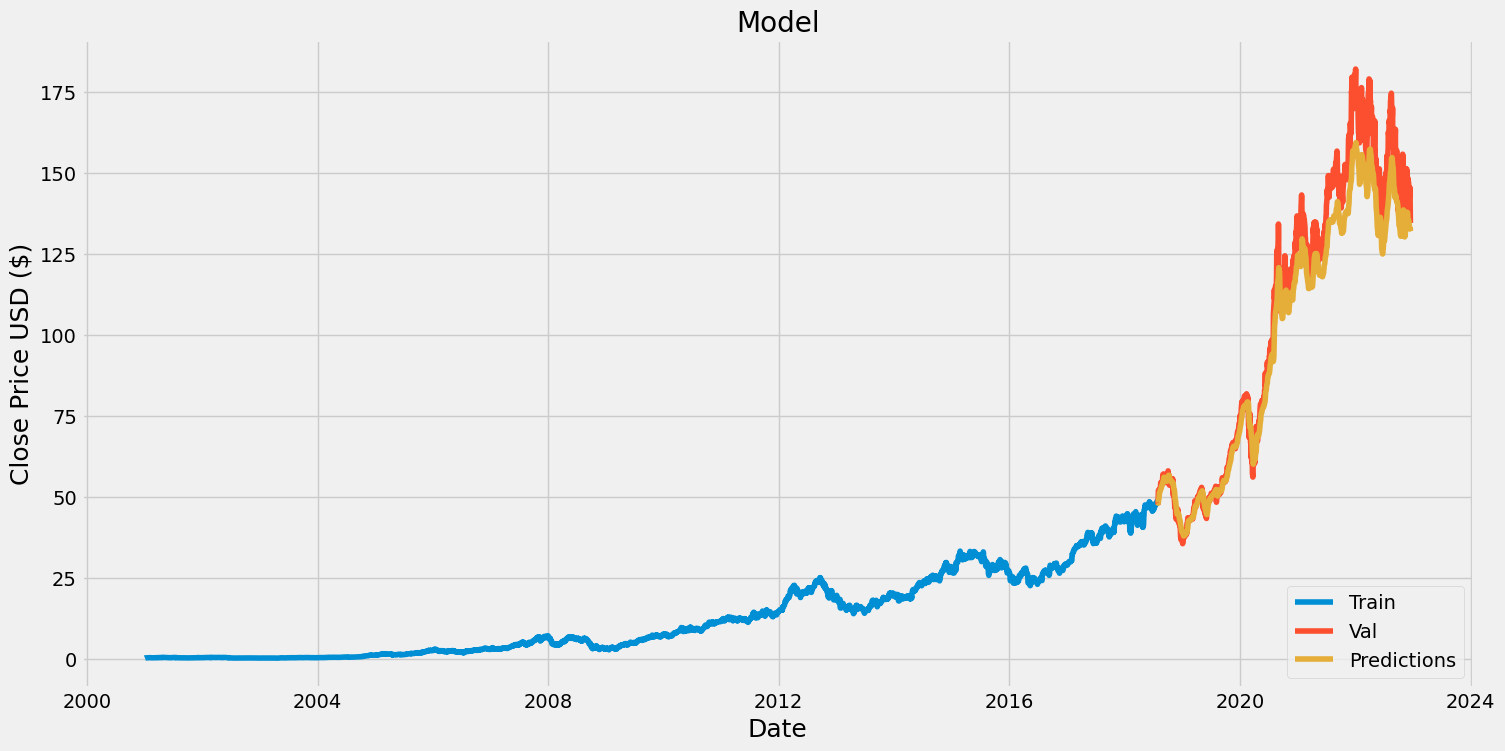

In [20]:
import warnings
warnings.filterwarnings("ignore")
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [21]:
valid

,Close,predictions
Date,,
2018-07-31,47.572498,48.147373
2018-08-01,50.375000,48.046719
2018-08-02,51.847500,48.281563
2018-08-03,51.997501,48.832413
2018-08-06,52.267502,49.496967
...,...,...
2022-12-12,144.490005,132.825058
2022-12-13,145.470001,132.668060
2022-12-14,143.210007,132.819473


In [22]:
import joblib
from sklearn.preprocessing import MinMaxScaler
assert isinstance(scaler, MinMaxScaler)

In [23]:
apple_quote =  yf.download('AAPL', start='2001-1-1' , end='2022-12-17')
new_df=apple_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
x_test=[]
x_test.append(last_60_days_scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price=model.predict(x_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 15ms/step
[[130.72905]]


In [24]:
tickers = ['AAPL','MSFT','GE','IBM','AA','DAL','UAL', 'PEP', 'KO','TSLA']

In [25]:
apple_quote2 = yf.download(tickers,start='2022-12-17',end='2023-08-22', auto_adjust=True)['Close']
apple_quote2
print(apple_quote2)

[*********************100%%**********************]  10 of 10 completed
                   AA        AAPL        DAL          GE         IBM  \
Date                                                                   
2022-12-19  41.821617  131.807632  32.759312   60.791599  133.799759   
2022-12-20  43.570774  131.737961  32.739414   62.559429  136.121780   
2022-12-21  44.341587  134.874573  33.505653   64.623192  136.950378   
2022-12-22  43.333599  131.668243  32.759312   63.680874  135.736374   
2022-12-23  43.679482  131.299820  32.998142   63.696449  136.478256   
...               ...         ...        ...         ...         ...   
2023-08-15  30.210949  177.449997  42.899933  113.768127  141.869995   
2023-08-16  29.185329  176.570007  42.550911  113.488327  140.639999   
2023-08-17  28.986181  174.000000  41.663395  110.880203  140.660004   
2023-08-18  28.846775  174.490005  41.374207  111.709610  141.410004   
2023-08-21  28.468393  175.839996  41.623508  111.939438  142.279

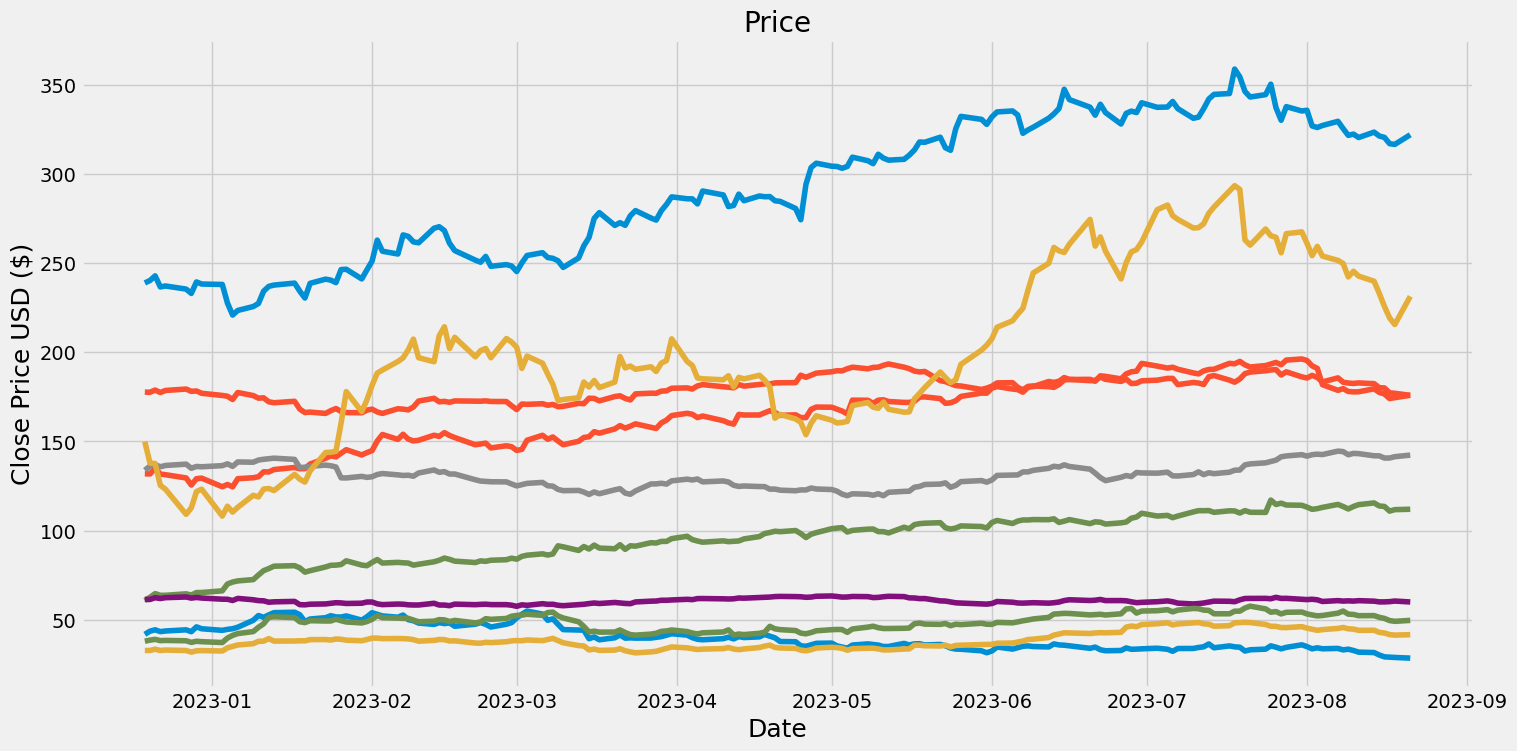

In [26]:
plt.figure(figsize=(16,8))
plt.title('Price')
plt.plot(apple_quote2)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [27]:
apple_quote2.to_csv('apple.csv',index=False)

In [28]:
apple=pd.read_csv('apple.csv')